## **Artificial Intelligence Project : Water Quality Prediction (Water Potability)**

Contributors:

+ ITDSIU21001 - Phan Quốc Anh- Data Preprocessing and Comparision

+ ITDSIU21067 - Nguyễn Quốc Huy - EDA and Modeling

In [ ]:
!jupyter nbconvert /content/Water_Quality_Prediction.ipynb --to html

[NbConvertApp] Converting notebook /content/Water_Quality_Prediction.ipynb to html
[NbConvertApp] Writing 4686929 bytes to /content/Water_Quality_Prediction.html


# Import Libraries, Modules and Dataset

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')



In [ ]:
# load dataset

df = pd.read_csv('https://raw.githubusercontent.com/quocanhphan/Water-Quality-Prediction/main/data/water_potability.csv')

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


# Data Preprocessing
In this section, we load the dataset and perform initial preprocessing.


In [ ]:
# all the features of the dataset
df.columns.tolist()

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity',
 'Potability']

In [ ]:
# total number of rows and columns in the dataset
df.shape

(3276, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


**Description of Attributes:**

The dataset includes the following key attributes:

+ ph: pH of the water (float).
+ Hardness: Hardness of the water (float).
+ Solids: Total dissolved solids in water (float).
+ Chloramines: Amount of Chloramines in water (float).
+ Sulfate: Amount of Sulfates in water (float).
+ Conductivity: Electrical conductivity of the water (float).
+ Organic_carbon: Amount of organic carbon in water (float).
+ Trihalomethanes: Concentration of Trihalomethanes (float).
+ Turbidity: Measure of water turbidity (float).
+ Potability: Indicates if water is potable (1 for potable, 0 for not potable) (integer).[**target**]

Specific Description:

+ pH: Measures the acidity or alkalinity of water on a scale from 0 to 14, with 7 being neutral. Values below 7 indicate acidity, while values above 7 indicate alkalinity.

+ Hardness: Indicates the concentration of calcium and magnesium salts in water. High hardness can lead to scaling in pipes and appliances.

+ Solids: Refers to the total dissolved and particles suspended in water. High levels can affect water clarity and quality.

+ Chloramines: Compounds formed by the reaction of chlorine with ammonia, used as a disinfectant in water treatment. High levels can cause an unpleasant taste and odor.

+ Sulfate: Represents the concentration of sulfate ions in water. Excessive sulfate can lead to a laxative effect and a bitter taste.

+ Conductivity: Measures the water's ability to conduct electricity, which correlates with the concentration of dissolved salts and minerals.

+ Organic Carbon: Indicates the amount of carbon in organic compounds within water. High levels can promote bacterial growth and indicate contamination.

+ Trihalomethanes: Chemical compounds that can form as byproducts during water chlorination. High levels are associated with health risks, including cancer.

+ Turbidity: Measures the cloudiness or haziness of water caused by suspended particles. High turbidity can harbor pathogens and reduce water quality.

+ Potability: Indicates whether water is safe to drink. It is determined by analyzing various physical, chemical, and biological parameters.

In [ ]:
# Display statistical summary of the dataset
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


**Check for Duplicates**

In [ ]:
# Check for duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


Since there are no duplicates in the dataset, the data shape remain the same.

In [ ]:
# Remove duplicates if any
df = df.drop_duplicates()
print("Data shape:", df.shape)

Data shape: (3276, 10)


**Check for Missing Values**

In [ ]:
# Check for missing values
df.isnull().sum().sort_values(ascending=False)

Sulfate            781
ph                 491
Trihalomethanes    162
Hardness             0
Solids               0
Chloramines          0
Conductivity         0
Organic_carbon       0
Turbidity            0
Potability           0
dtype: int64

**Handle Missing Values**

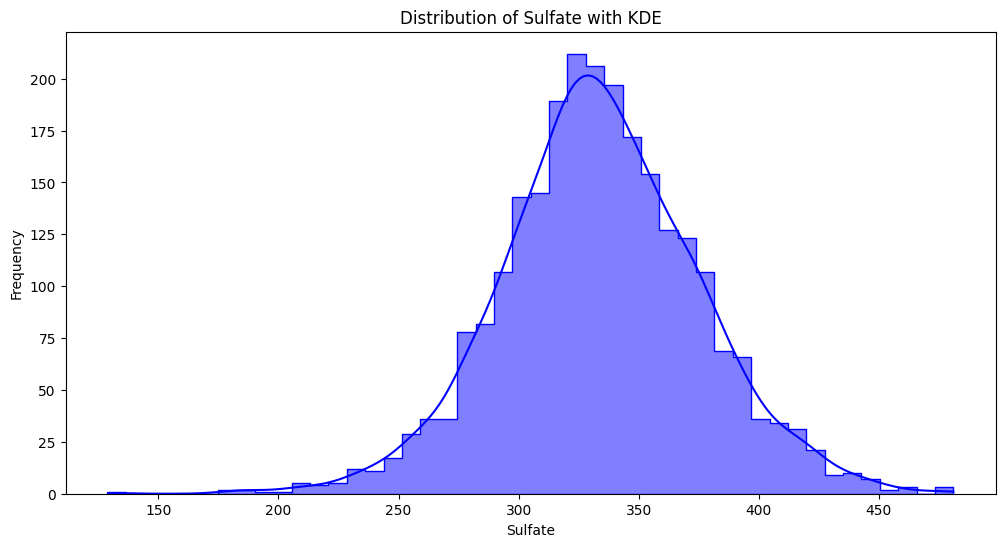

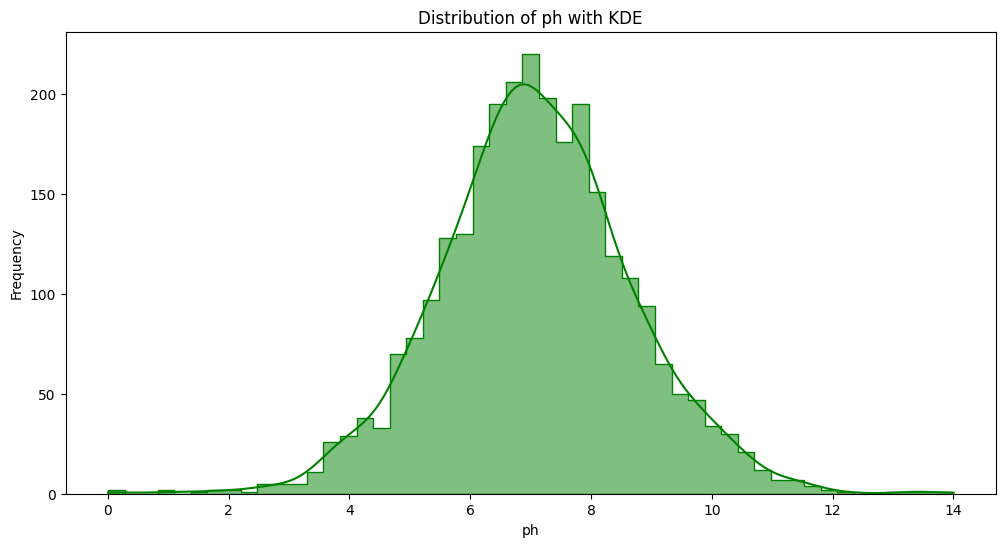

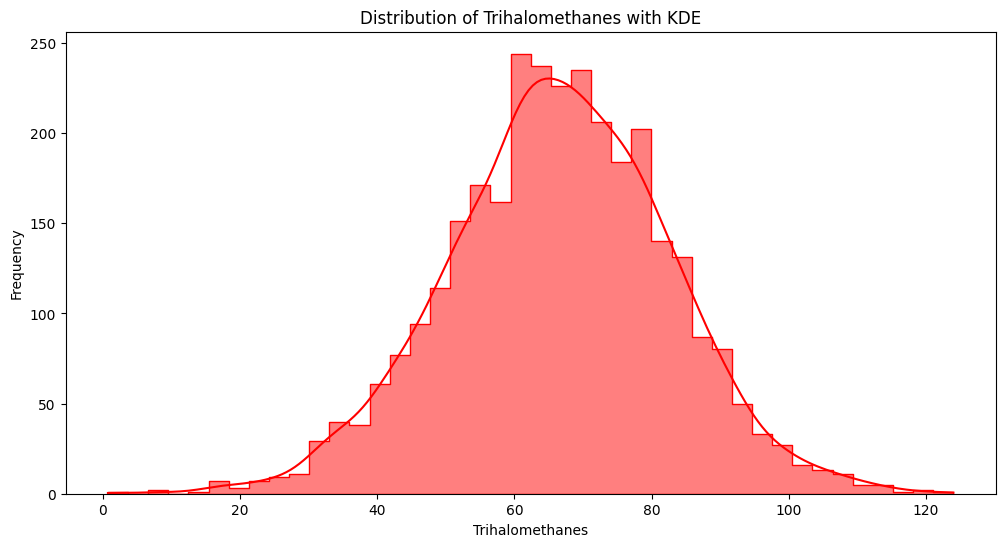

In [ ]:
# Histogram and KDE for 'Sulfate'
plt.figure(figsize=(12, 6))
sns.histplot(df['Sulfate'], kde=True, color='blue', element='step')
plt.title('Distribution of Sulfate with KDE')
plt.xlabel('Sulfate')
plt.ylabel('Frequency')
plt.show()

# Histogram and KDE for 'ph'
plt.figure(figsize=(12, 6))
sns.histplot(df['ph'], kde=True, color='green', element='step')
plt.title('Distribution of ph with KDE')
plt.xlabel('ph')
plt.ylabel('Frequency')
plt.show()

# Histogram and KDE for 'Trihalomethanes'
plt.figure(figsize=(12, 6))
sns.histplot(df['Trihalomethanes'], kde=True, color='red', element='step')
plt.title('Distribution of Trihalomethanes with KDE')
plt.xlabel('Trihalomethanes')
plt.ylabel('Frequency')
plt.show()

The data is not normally distributed so we will use the median to fill missing values

In [ ]:
# Impute missing values using the median for each column
imputer = SimpleImputer(strategy='median')
df['Sulfate'] = imputer.fit_transform(df[['Sulfate']])
df['ph'] = imputer.fit_transform(df[['ph']])
df['Trihalomethanes'] = imputer.fit_transform(df[['Trihalomethanes']])

In [ ]:
# Confirm that there are no more missing values
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

**Outlier Detection and Handling**

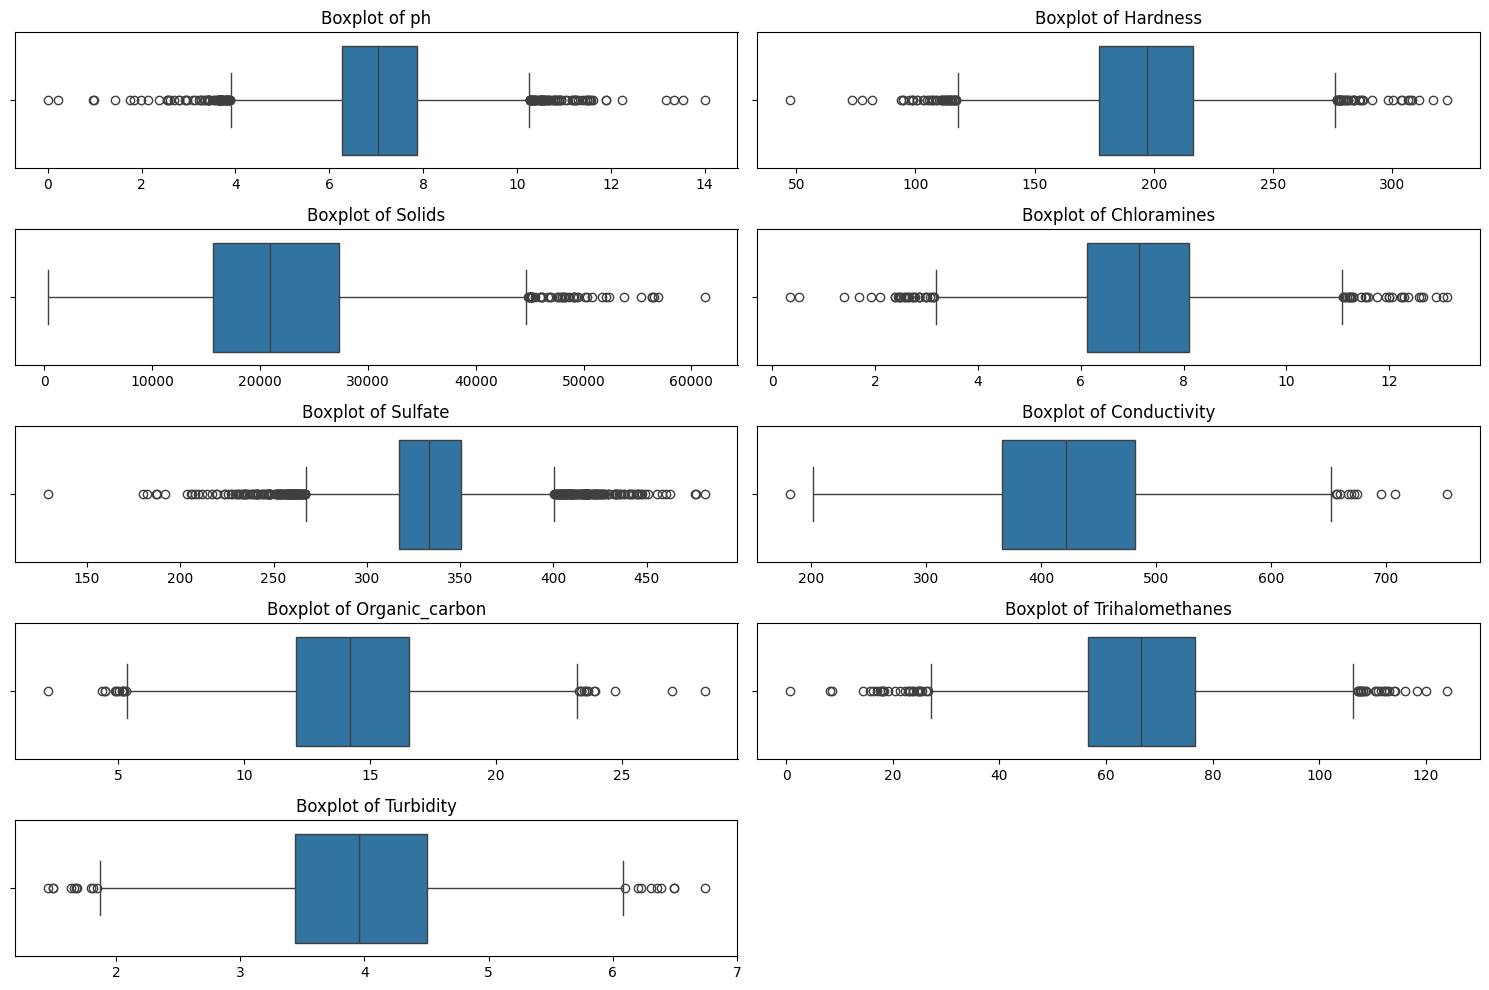

In [ ]:
# Set up the subplot grid
fig, ax = plt.subplots(5, 2, figsize=(15, 10))  # Defined layout with 5 rows and 2 columns
fig.subplots_adjust(hspace=0.5, wspace=0.4)  # Adjust spacing between plots for clarity

# Flatten the array of axes to simplify the iteration process
axes = ax.flatten()

# Excluding 'potability'
features = df.columns[:-1]

# Loop through the features and plot each one in a subplot
for i, feature in enumerate(features):
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# If there are more subplots than features, hide the extra subplots
if len(features) < len(axes):
    for j in range(len(features), len(axes)):
        axes[j].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Function to detect outliers based on the IQR
def find_outliers(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers

feature_name = 'Sulfate'
outliers = find_outliers(df, feature_name)

# Print the outliers
print(f"Outliers in {feature_name}:")
outliers

Outliers in Sulfate:


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0
51,7.809632,100.457615,12013.550629,5.212315,247.200826,605.220124,9.611349,66.084174,2.447444,0
84,6.395359,133.834229,23827.275015,5.127747,266.908428,573.400295,9.833875,95.026609,4.191218,0
112,7.725333,252.265491,36477.738112,8.386761,426.543590,339.411327,17.485844,60.483885,3.724837,0
118,7.397413,122.541040,8855.114121,6.888689,241.607532,489.851600,13.365906,66.622485,3.149158,0
...,...,...,...,...,...,...,...,...,...,...
3115,4.709187,179.141018,22291.418577,6.774276,407.417977,371.264843,18.186801,86.528627,3.860084,0
3116,5.230003,176.714023,27971.891806,7.597981,413.914001,440.355374,14.423614,72.837370,3.045612,0
3162,9.079715,222.042631,53735.899194,6.894915,254.040977,382.896167,12.704887,101.615346,4.551724,1
3176,8.610963,125.158770,32079.774815,9.844921,264.052839,342.205252,12.947376,53.950269,4.614400,1


Not handling outliers might be advisable due to

+ the nature of water quality data, where outliers could represent significant. These extreme values are crucial for accurately predicting water potability.

+ the Machine Learning models like Random Forest and Gradient Boosting are robust to outliers, they can effectively manage these extremes without prior modifications.

Thus, retaining outliers allows the models to recognize and respond to critical water quality changes, enhancing the practical utility of our predictions in real-world scenarios.

# Exploratory Data Analysis (EDA)

In [ ]:
df.shape

(3276, 10)

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
# Display summary statistics of the dataset
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.074194,196.369496,22014.092526,7.122277,333.608364,426.205111,14.284970,66.407478,3.966786,0.390110
std,1.470040,32.879761,8768.570828,1.583085,36.143851,80.824064,3.308162,15.769958,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


**Distribution of the target variable 'Potability'  (1 for potable, 0 for not potable)**

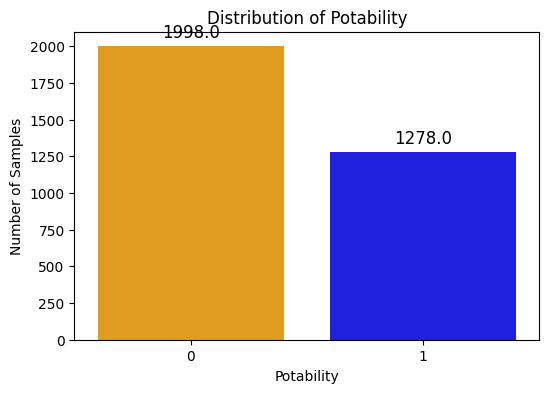

In [ ]:
# Check the distribution of the target variable 'Potability'

fig, ax = plt.subplots(figsize=(6, 4))

sns.countplot(ax=ax, x='Potability', data=df, palette=['orange', 'blue'])
ax.set_title('Distribution of Potability')
ax.set_xlabel('Potability')
ax.set_ylabel('Number of Samples')

# Annotate each bar with the count value
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.show()

<Figure size 1800x1200 with 0 Axes>

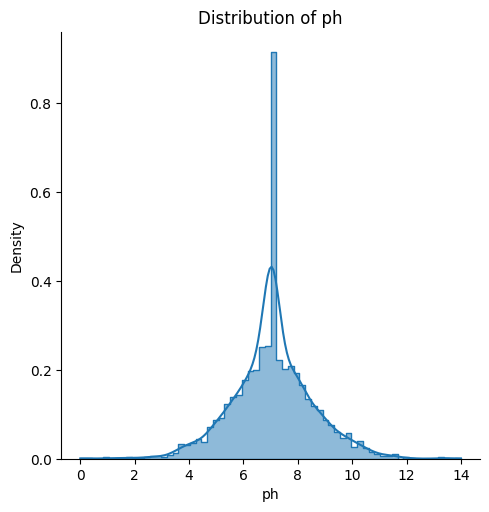

In [ ]:
plt.figure(figsize=(18,12))
sns.displot(df['ph'], stat='density', kind='hist', kde=True,
            element='step', fill=True)
plt.title("Distribution of ph")
plt.show()

**Correlation Matrix**

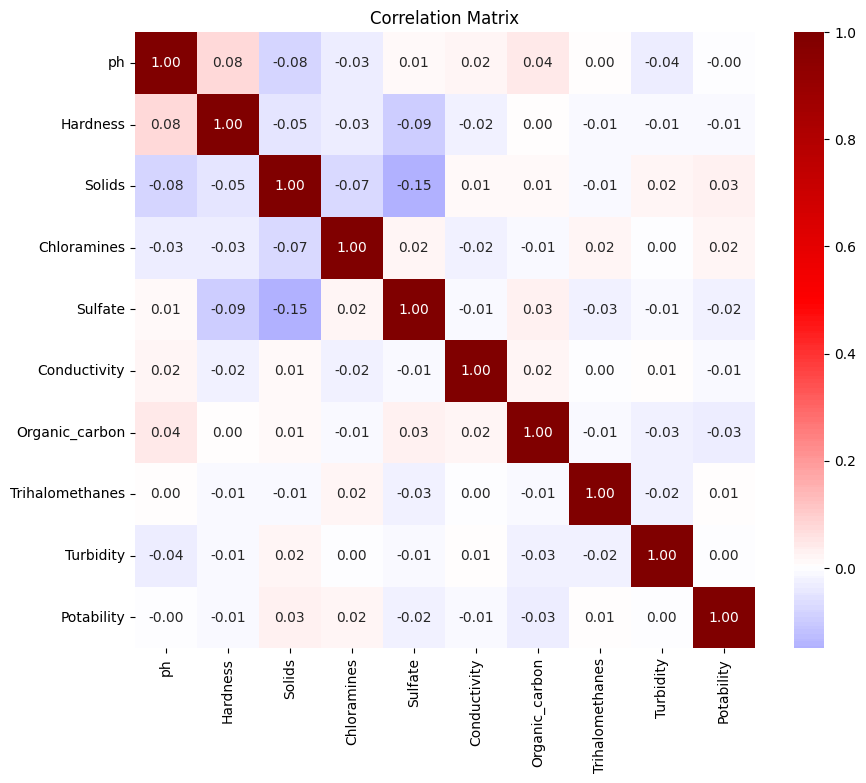

In [ ]:
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='seismic', center=0)
plt.title('Correlation Matrix')
plt.show()

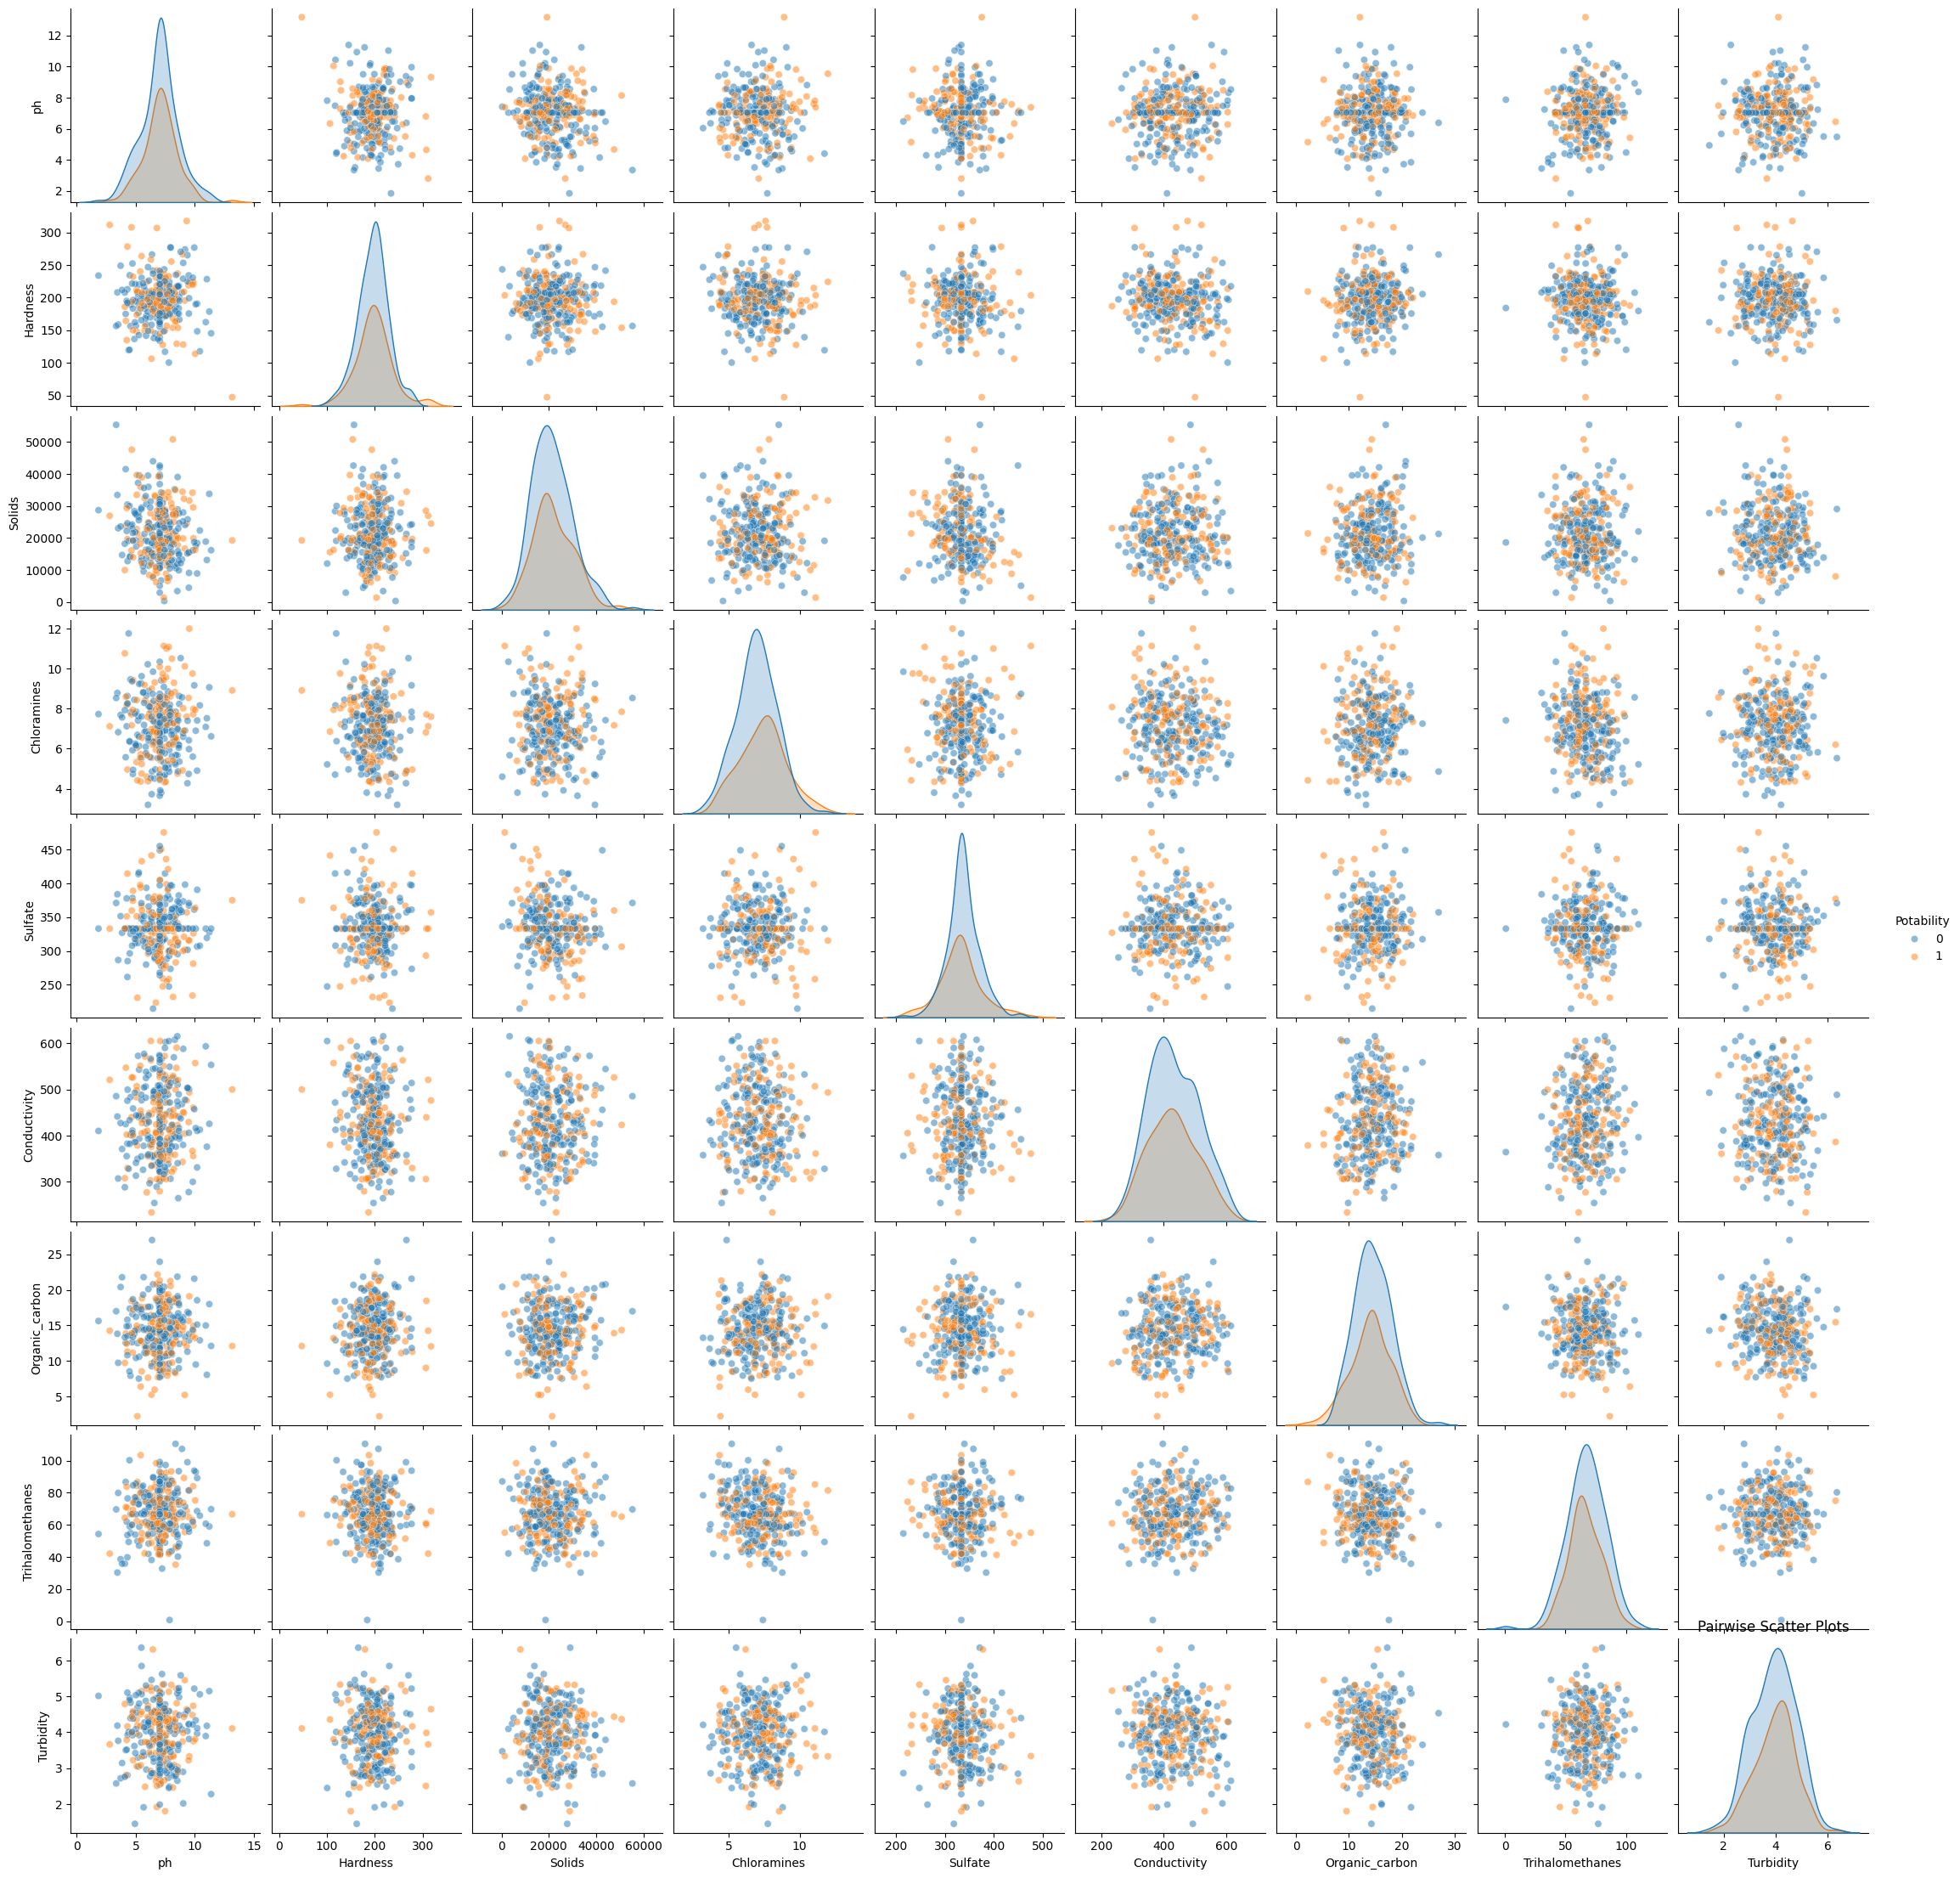

In [ ]:
# Use seaborn's pairplot to visualize pairwise relationships between features
# Sampled data to speed up plotting
sampled_data = df.sample(frac=0.1, random_state=42)
sns.pairplot(sampled_data, hue='Potability', plot_kws={'alpha': 0.5})
plt.title('Pairwise Scatter Plots')
plt.show()


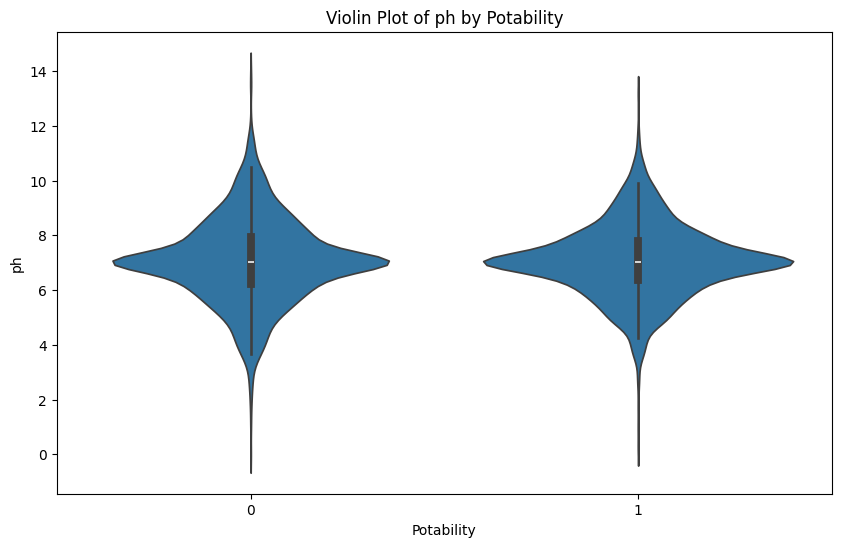

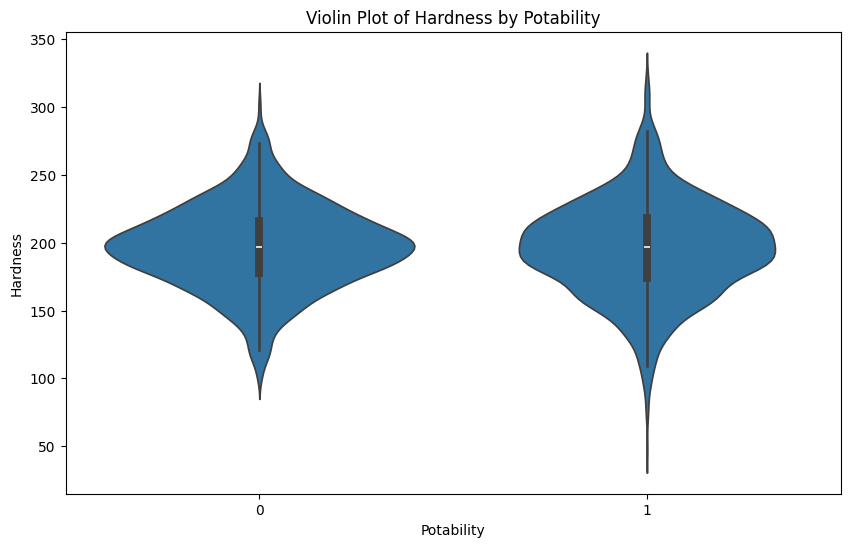

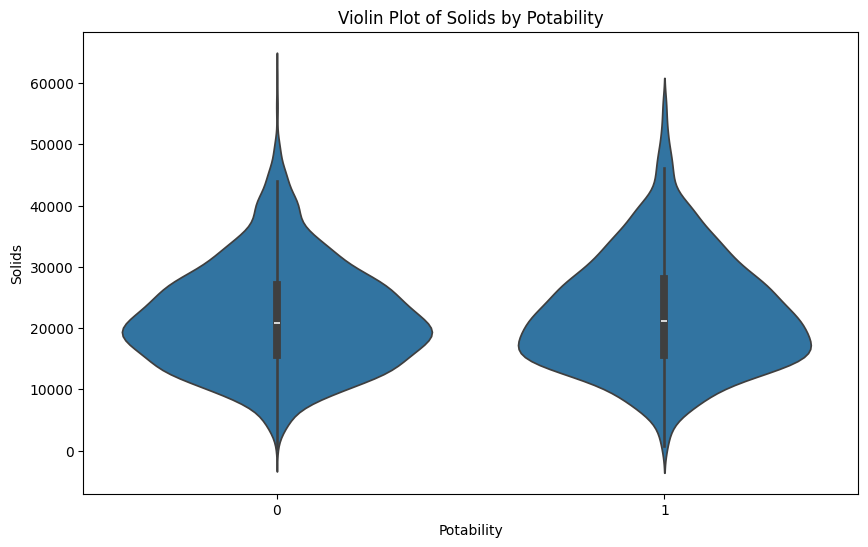

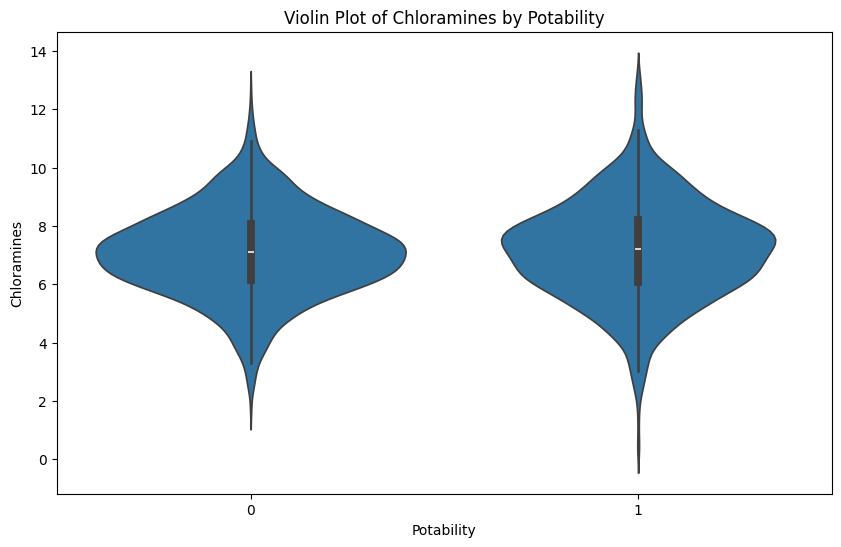

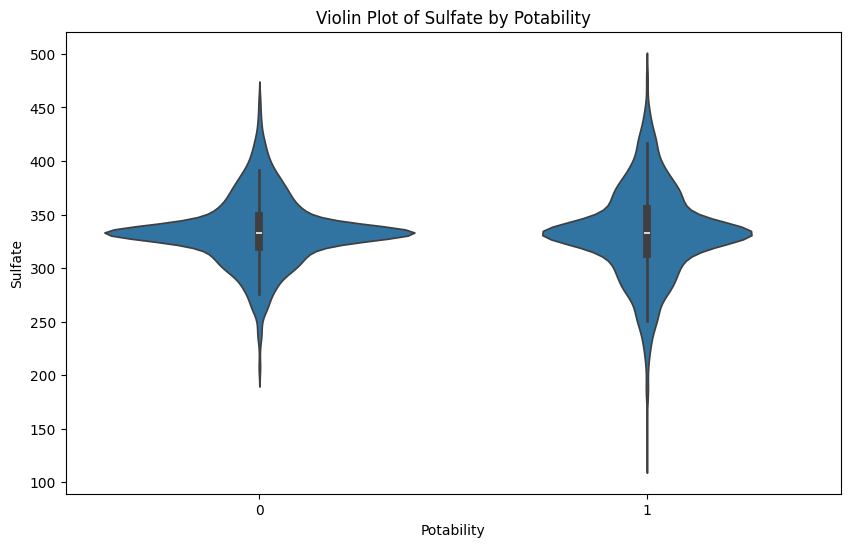

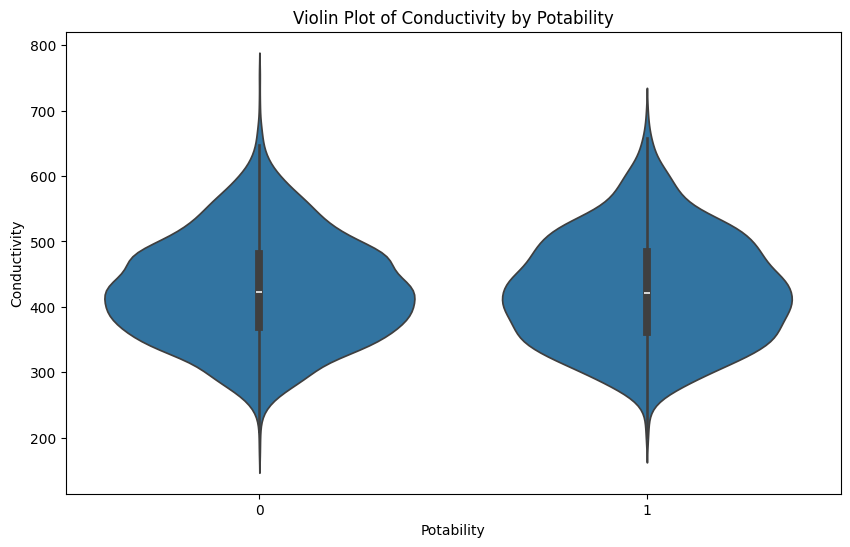

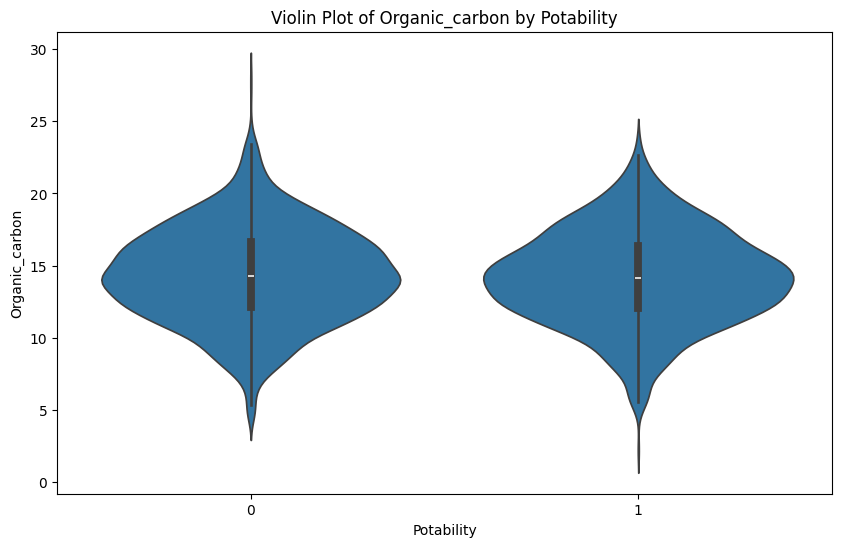

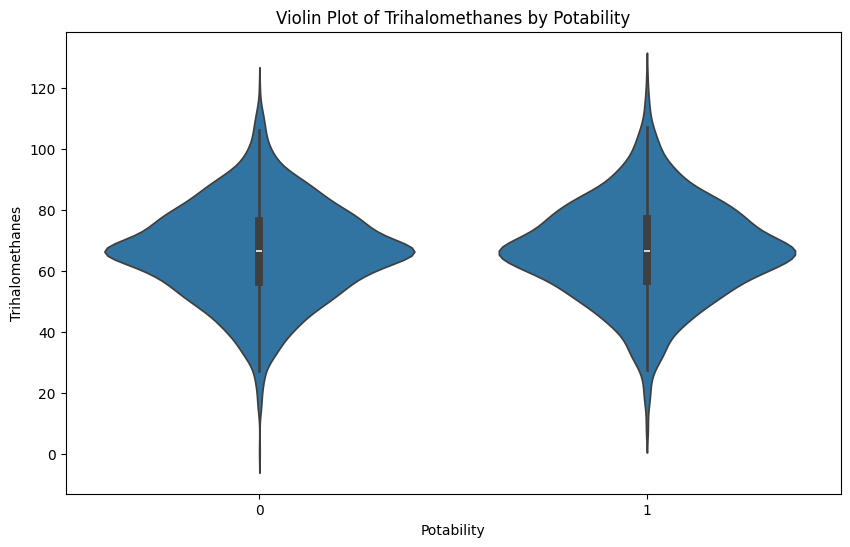

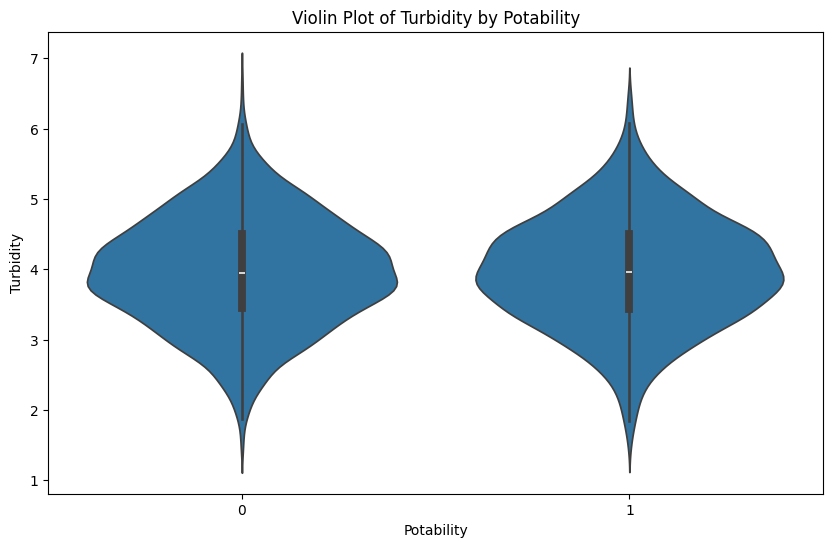

In [ ]:
# violin plots for more insights
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='Potability', y=feature, data=df)
    plt.title(f'Violin Plot of {feature} by Potability')
    plt.show()


# Modelling and Evaluation

**Prepare Data for Modelling**

In [ ]:
# Divided data into independent and dependent variables

X = df.drop('Potability', axis=1)
y = df['Potability']

In [ ]:
X.shape, y.shape

((3276, 9), (3276,))

**Scaling Data**

In [ ]:
# Feature scaling using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

**Split the dataset**

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2620, 9), (656, 9), (2620,), (656,))

**Model Training and Predictions**

In [ ]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest Classifier': RandomForestClassifier(),
    'SVM': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Neural Network': MLPClassifier()
}

for name, model in models.items():
    print(f"{name}: {model}")


Logistic Regression: LogisticRegression()
Random Forest Classifier: RandomForestClassifier()
SVM: SVC()
Gradient Boosting: GradientBoostingClassifier()
Neural Network: MLPClassifier()


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Creating model object
model_lg = LogisticRegression(max_iter=120,random_state=0, n_jobs=20)
# Training Model
model_lg.fit(X_train, y_train)
LogisticRegression(max_iter=120, n_jobs=20, random_state=0)


LogisticRegression(max_iter=120, n_jobs=20, random_state=0)

In [ ]:
# Making Prediction
y_pred = model_lg.predict(X_test)

In [ ]:
# Calculating Accuracy Score
lg = accuracy_score(y_test, y_pred)
print(lg)

0.6097560975609756


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76       400
           1       0.00      0.00      0.00       256

    accuracy                           0.61       656
   macro avg       0.30      0.50      0.38       656
weighted avg       0.37      0.61      0.46       656



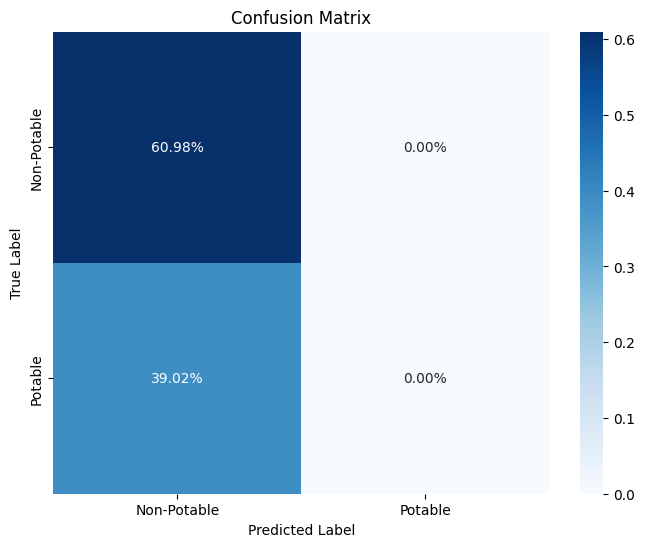

In [ ]:
# Compute confusion matrix
cm1 = confusion_matrix(y_test, y_pred)
# Create a heatmap for the confusion matrix for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm1/np.sum(cm1), annot=True, fmt='0.2%', cmap='Blues', xticklabels=['Non-Potable', 'Potable'], yticklabels=['Non-Potable', 'Potable'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



train_and_evaluate_model

In [ ]:
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):

    # Train the model
    model.fit(X_train, y_train)

    # Predict the responses for test dataset
    y_pred = model.predict(X_test)

    # Calculating Accuracy Score
    acc = accuracy_score(y_test, y_pred)
    print('Accuracy Score: ', acc)

    # Print the classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    # Create a heatmap for the confusion matrix for better visualization
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm/np.sum(cm), annot=True, fmt='0.2%', cmap='Blues', xticklabels=['Non-Potable', 'Potable'], yticklabels=['Non-Potable', 'Potable'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

Random Forest Classifier

Accuracy Score:  0.6097560975609756
Classification Report:
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       400
           1       0.00      0.00      0.00       256

    accuracy                           0.61       656
   macro avg       0.30      0.50      0.38       656
weighted avg       0.37      0.61      0.46       656



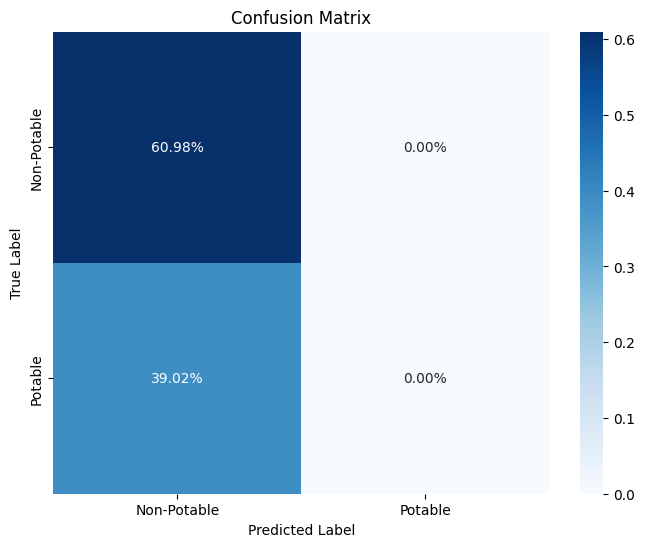

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Assuming you have already defined X_train, X_test, y_train, y_test
model_rf = RandomForestClassifier(n_estimators=300,min_samples_leaf=0.16, random_state=42)
train_and_evaluate_model(model_rf, X_train, y_train, X_test, y_test)

SVM

In [ ]:
from sklearn.svm import SVC

Evaluating SVM Model:
Accuracy Score:  0.6707317073170732
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.93      0.77       400
           1       0.70      0.27      0.39       256

    accuracy                           0.67       656
   macro avg       0.68      0.60      0.58       656
weighted avg       0.68      0.67      0.62       656



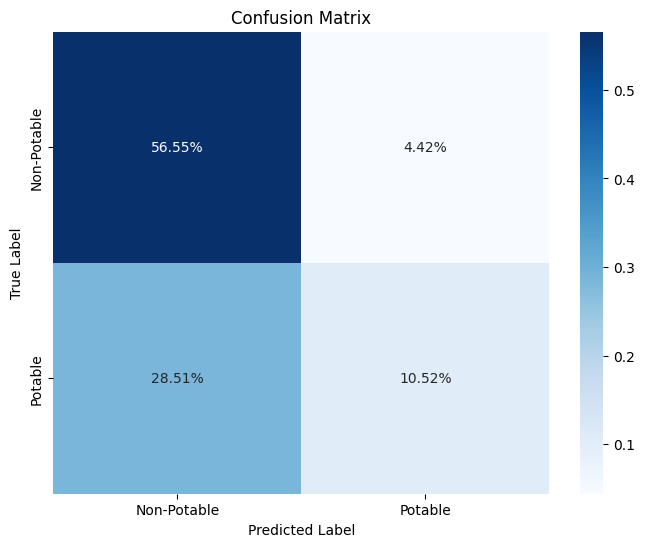

In [ ]:
# Setup and evaluate an SVM model
print("Evaluating SVM Model:")
model_svm = SVC(kernel='rbf', random_state = 42)

train_and_evaluate_model(model_svm, X_train, y_train, X_test, y_test)


 Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

Evaluating Gradient Boosting Model:
Accuracy Score:  0.6524390243902439
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.91      0.76       400
           1       0.64      0.25      0.36       256

    accuracy                           0.65       656
   macro avg       0.65      0.58      0.56       656
weighted avg       0.65      0.65      0.60       656



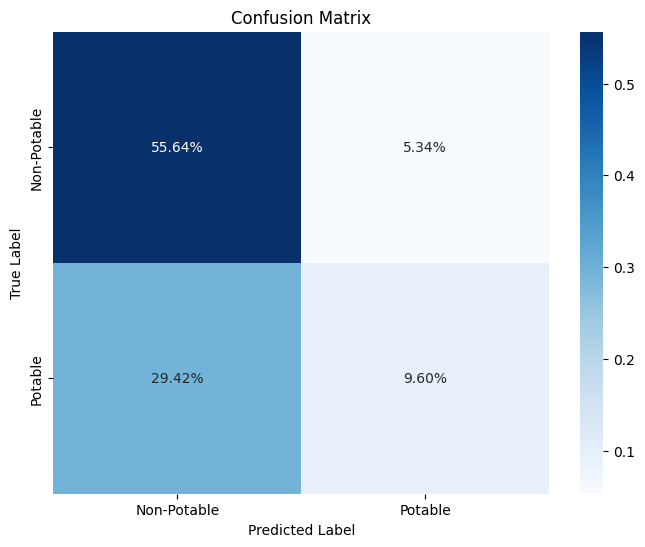

In [ ]:
# Setup and evaluate a Gradient Boosting model
print("Evaluating Gradient Boosting Model:")
model_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
train_and_evaluate_model(model_gb, X_train, y_train, X_test, y_test)


Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier

Evaluating Neural Network Model:
Accuracy Score:  0.6371951219512195
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.79      0.73       400
           1       0.55      0.39      0.46       256

    accuracy                           0.64       656
   macro avg       0.61      0.59      0.59       656
weighted avg       0.62      0.64      0.62       656



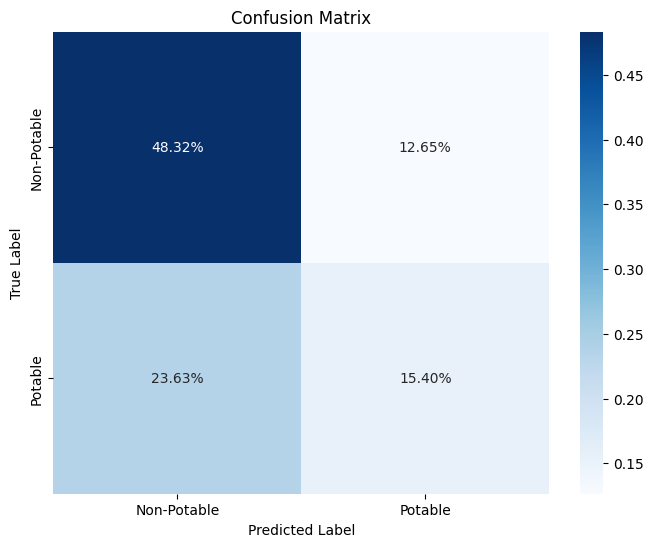

In [ ]:
# Setup and evaluate a Neural Network model
print("Evaluating Neural Network Model:")
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', solver='adam', random_state=42)
train_and_evaluate_model(mlp_model, X_train, y_train, X_test, y_test)


# Comparison

In [ ]:
# Define the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=120,random_state=0, n_jobs=20),
    'Random Forest': RandomForestClassifier(n_estimators=300,min_samples_leaf=0.16, random_state=42),
    'SVM': SVC(kernel='rbf', random_state = 42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', solver='adam', random_state=42)
}

In [ ]:
import time

In [ ]:
# Initialize dictionary to store performance metrics
performance = {model_name: {} for model_name in models.keys()}

# Initialize dictionary to store training and prediction times
timings = {model_name: {'Training Time': 0, 'Prediction Time': 0} for model_name in models.keys()}


# Train each model and store performance metrics
for name, model in models.items():

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    # Measure prediction time
    start_time = time.time()
    y_pred = model.predict(X_test)
    prediction_time = time.time() - start_time

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store metrics in the dictionary
    performance[name]['Accuracy'] = accuracy
    performance[name]['Precision'] = precision
    performance[name]['Recall'] = recall
    performance[name]['F1 Score'] = f1

    # Store timings
    timings[name]['Training Time'] = training_time
    timings[name]['Prediction Time'] = prediction_time

    print(f"Metrics for {name}:")
    print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}\n")
    print(f"Timings for {name}:")
    print(f"Training Time: {training_time:.2f} seconds, Prediction Time: {prediction_time:.2f} seconds\n")
    print('\n')


Metrics for Logistic Regression:
Accuracy: 0.61, Precision: 0.37, Recall: 0.61, F1 Score: 0.46

Timings for Logistic Regression:
Training Time: 0.44 seconds, Prediction Time: 0.00 seconds



Metrics for Random Forest:
Accuracy: 0.61, Precision: 0.37, Recall: 0.61, F1 Score: 0.46

Timings for Random Forest:
Training Time: 0.82 seconds, Prediction Time: 0.03 seconds



Metrics for SVM:
Accuracy: 0.67, Precision: 0.68, Recall: 0.67, F1 Score: 0.62

Timings for SVM:
Training Time: 0.30 seconds, Prediction Time: 0.08 seconds



Metrics for Gradient Boosting:
Accuracy: 0.65, Precision: 0.65, Recall: 0.65, F1 Score: 0.60

Timings for Gradient Boosting:
Training Time: 0.99 seconds, Prediction Time: 0.00 seconds



Metrics for Neural Network:
Accuracy: 0.64, Precision: 0.62, Recall: 0.64, F1 Score: 0.62

Timings for Neural Network:
Training Time: 9.25 seconds, Prediction Time: 0.00 seconds





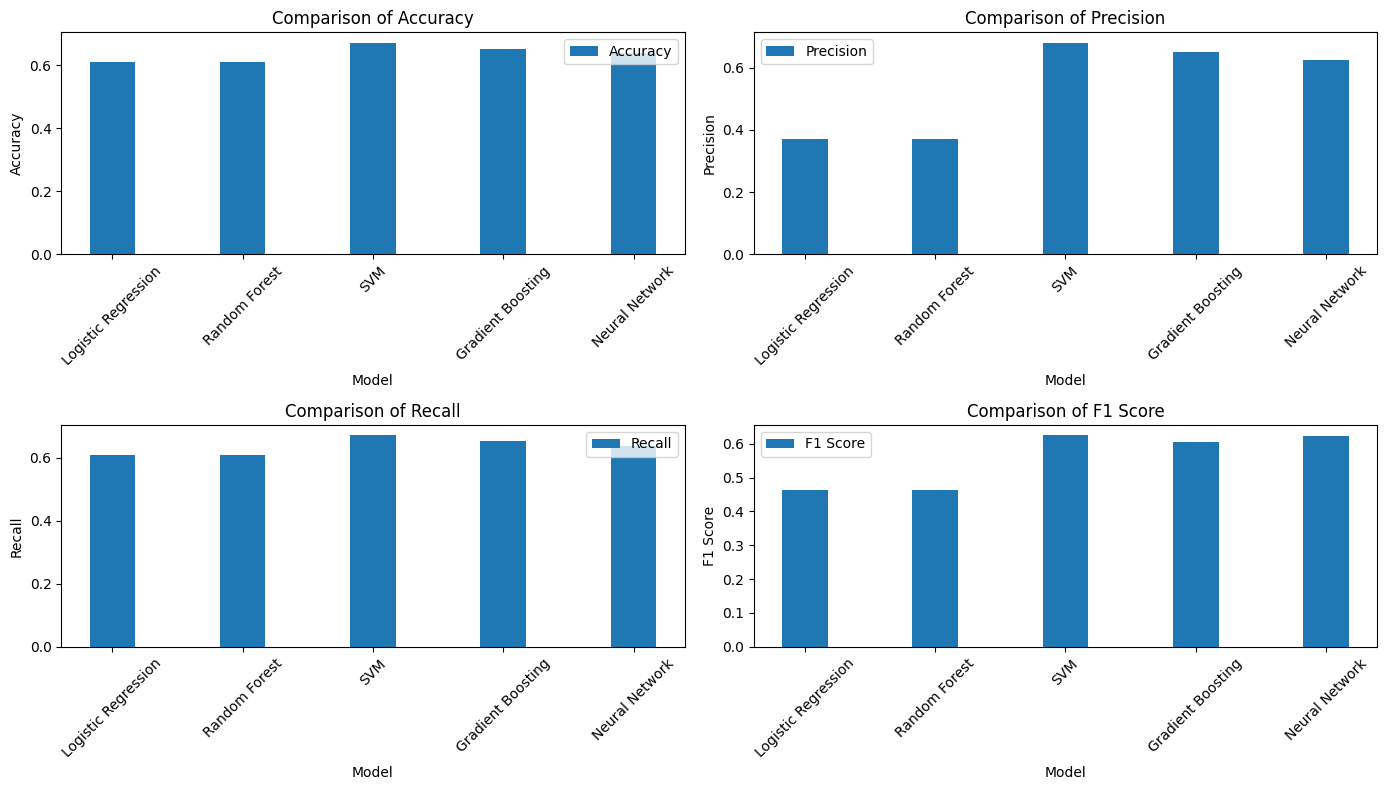

In [ ]:
# Set up the figure size
plt.figure(figsize=(14, 8))

# Number of models
n_groups = len(models)

# Create bar chart for each metric
for i, metric in enumerate(['Accuracy', 'Precision', 'Recall', 'F1 Score'], 1):
    ax = plt.subplot(2, 2, i)
    index = np.arange(n_groups)
    bar_width = 0.35

    # Get metric values
    values = [performance[model][metric] for model in models.keys()]

    rects = plt.bar(index, values, bar_width, label=metric)

    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.title(f'Comparison of {metric}')
    plt.xticks(index, models.keys(), rotation=45)
    plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Convert the timings dictionary to a DataFrame for easy visualization
timings_df = pd.DataFrame(timings).T  # Transpose to have models as rows and timings as columns
timings_df.columns = ['Training Time (seconds)', 'Prediction Time (seconds)']
print(timings_df)


                     Training Time (seconds)  Prediction Time (seconds)
Logistic Regression                 0.441571                   0.000428
Random Forest                       0.821097                   0.031730
SVM                                 0.295896                   0.075161
Gradient Boosting                   0.993557                   0.001452
Neural Network                      9.254081                   0.000719


SVM stands out as the best model given its highest scores across all key performance metrics. While its prediction time is the longest among the models, it remains within a reasonable range (0.08 seconds), which is acceptable in many applications, especially given its superior accuracy and precision.

**Conclusion**:The SVM is recommended for scenarios where the highest model accuracy and precision are crucial, and slight delays in prediction times are acceptable.